# Exploratory Data Analysis [ EDA ] - googleplaystore Dataset

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
font1 = {'family':'serif','color':'darkred','size':18}
font2 = {'family':'serif','color':'darkred','size':15}

### Importing the google play store dataset 

In [6]:
data  = pd.read_csv("googleplaystore.csv")

### Look at the dataset first 

In [8]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- The Google Play Store dataset provides structured information about thousands of mobile applications available on the Google Play Store.
- Dataset contain features like app category, rating, reviews, size, installs, type, price, genres, etc. 

### Find Shape of Our Dataset [ Total Number of Rows, Total Number of Columns ]

In [11]:
print('shape of the dataset ::',data.shape)
print('Number of total Rows ::',data.shape[0])
print('Number of total Columns ::',data.shape[1])

shape of the dataset :: (10841, 13)
Number of total Rows :: 10841
Number of total Columns :: 13


- Each row corresponds to one Android application
- Each column describes a specific attribute of that app, such as popularity, quality, pricing, or compatibility

### Get Information About Our Dataset like Total Number of Rows, Total Number of Columns, Datatypes of Each Column and Memory Requirement

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- The Google Play Store dataset consists of 10,841 app records describing Android applications available on the Google Play Store.
- It contains a mix of numerical and categorical features, with only one true numerical column (Rating) and several numeric attributes stored as text (Reviews, Installs, Price, Size).
- Some immediate data quality issues are observed, including missing values in Rating, Type, Content Rating, and version-related columns, along with inconsistent formatting.

### Check for NaN values

In [17]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- Dataset contains NaN value :
- Rating :: 1474  - Can be handle through mean() missing value imputation
- Type, Current ver and Android ver can be drop - very samll amount 


In [19]:
### Handling Missing value
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

In [20]:
### handling Duplicate value
data = data.drop_duplicates()

### Get Overall Statistics About The Dataset

In [22]:
data.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10358,10358,10358.000000,10358,10358,10358,10357,10358,10357,10358,10358,10350,10355
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1943,NaN,593,1526,1488,9591,9592,8382,842,298,1302,2379
mean,NaN,NaN,4.190079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.505406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The dataset shows a high dominance of categorical features, as most columns are of type object, resulting in statistics such as count, unique, top, and frequency rather than numeric summaries.
- The App column contains a large number of unique values, indicating that most records represent distinct applications, with very few duplicates.
- dataset that is rich in categorical insights but requires preprocessing, with clear evidence of market concentration, free-app dominance, rating inflation, and highly skewed popularity metrics.

### Total Number of App Titles Contain Astrology

In [25]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [26]:
 print("Apps with 'Astrology' in Title:")
data[data["App"].str.contains("Astrology", case=False, na=False)].shape[0] 

Apps with 'Astrology' in Title:


3

- Only 3 apps in the Google Play Store dataset contain the word “Astrology” in their title, indicating that astrology-related applications represent a very small and niche segment of the overall app ecosystem.
This low count suggests limited competition within this specific domain, but it may also reflect restricted demand or underrepresentation compared to mainstream categories such as Games, Tools, or Productivity.

### Find Average App Rating

In [29]:
print("The Average App rating is ::")
data['Rating'].mean().round(2)

The Average App rating is ::


4.19

- The average app rating of 4.19 in the Google Play Store dataset indicates that most applications are generally well-received by users.
- Ratings alone may not fully differentiate app quality, and should be interpreted alongside reviews, installs, and update frequency for a more balanced assessment.

### Find Total Number of Unique Categories

In [32]:
print("Total Number of Unique Categories ::",data['Category'].nunique())
print(data['Category'].unique())

Total Number of Unique Categories :: 34
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


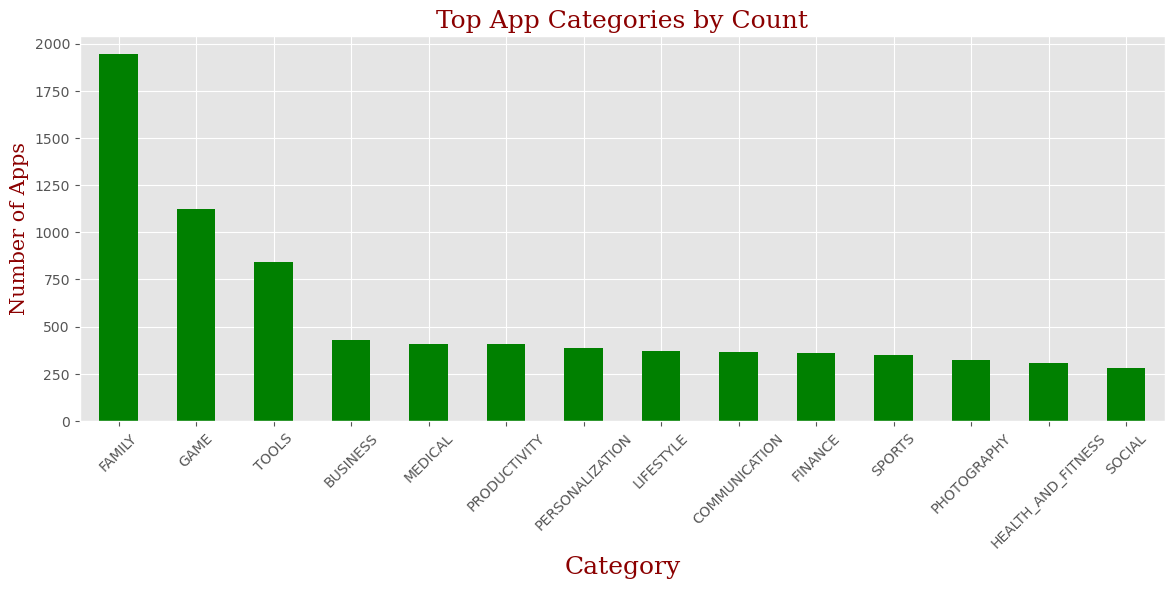

In [33]:
plt.figure(figsize=(14,5))
data['Category'].value_counts().head(14).plot(kind='bar',color='green')
plt.title("Top App Categories by Count",fontdict=font1)
plt.xlabel("Category",fontdict=font1)
plt.ylabel("Number of Apps",fontdict=font2)
plt.xticks(rotation=45)
plt.show()

- The dataset contains a large number of unique app categories, indicating that the Google Play Store supports a highly diverse app ecosystem.
- However, even though many categories exist, apps are not evenly distributed across them. A small number of categories (such as Games, Family, Tools, and Productivity) typically contain a significantly higher number of apps, pointing to high competition, while several categories remain niche with very few apps.

### Which Category is Getting The Highest Average Rating

In [36]:
data.groupby("Category")['Rating'].mean().sort_values(ascending=False).head(5)

Category
1.9                    19.000000
EDUCATION               4.374564
EVENTS                  4.363647
ART_AND_DESIGN          4.350462
BOOKS_AND_REFERENCE     4.311943
Name: Rating, dtype: float64

- In the Google Play Store dataset, the Category column contains app categories such as:
  - GAME, TOOLS, FAMILY, COMMUNICATION, PRODUCTIVITY, … etc.
- So this column is always text labels (strings), not numbers.
- Sometimes in this dataset (especially from Kaggle), some rows get shifted/misaligned because of:
- Missing values in some columns
- Bad formatting (commas inside numbers, like 1,000+)
- Wrong parsing of the CSV
- When that happens, a value from one column (like Rating = 1.9) accidentally shifts into the Category column. So instead of being under Rating, the number 1.9 got misplaced into Category.

In [38]:
data = data.drop(data[data["Category"] == "1.9"].index)

Category
EDUCATION              4.374564
EVENTS                 4.363647
ART_AND_DESIGN         4.350462
BOOKS_AND_REFERENCE    4.311943
PERSONALIZATION        4.305620
Name: Rating, dtype: float64


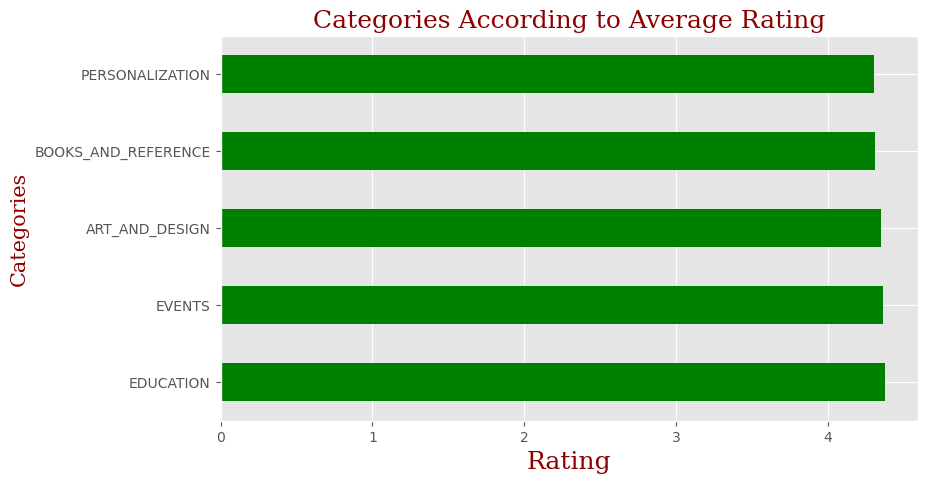

In [39]:
print(data.groupby("Category")['Rating'].mean().sort_values(ascending=False).head(5))
plt.figure(figsize=(9,5))
data.groupby("Category")['Rating'].mean().sort_values(ascending=False).head(5).plot(kind='barh',color='green')
plt.title("Categories According to Average Rating",fontdict=font1)
plt.xlabel("Rating",fontdict=font1)
plt.ylabel("Categories",fontdict=font2)
plt.show()

- The categories EVENTS, EDUCATION, ART_AND_DESIGN, BOOKS_AND_REFERENCE, and PERSONALIZATION exhibit the highest average app ratings, all scoring above 4.3, indicating strong user satisfaction within these segments.

### Find Total Number of Apps having 5 Star Rating

Number of apps with 5 star rating ::
271


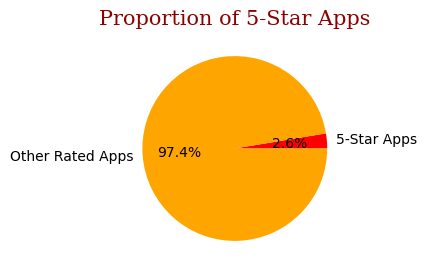

In [42]:
print("Number of apps with 5 star rating ::")
print(data[data['Rating']==5].value_counts().sum())
five_star_count = (data['Rating'] == 5).sum()
non_five_star_count = data['Rating'].notna().sum() - five_star_count
plt.figure(figsize=(5,3))
plt.pie( [five_star_count, non_five_star_count],labels=['5-Star Apps', 'Other Rated Apps'],colors =['red','orange'],autopct='%1.1f%%')
plt.title("Proportion of 5-Star Apps",fontdict=font2)
plt.show()

- There are 274 apps with a perfect 5-star rating, representing a very small fraction of the total apps in the Google Play Store dataset.
- In many cases, a 5-star rating may reflect limited but extremely positive feedback, so it should be interpreted alongside the number of reviews and installs rather than being treated as a standalone indicator of app quality.

### Average Value of Reviews
     Currently ' Reviews ' column is object type for average value it must need to covert to int 

In [45]:
data['Reviews'].describe()

count     10357
unique     6001
top           0
freq        593
Name: Reviews, dtype: object

In [46]:
data[~data['Reviews'].str.isnumeric()].value_counts()

Series([], Name: count, dtype: int64)

In [47]:
# All the values in the Reviews column is numeric 
data["Reviews"] = pd.to_numeric(data["Reviews"], errors="coerce")
print("Average Reviews:", data["Reviews"].mean().round(2))

Average Reviews: 405904.61


- The average number of reviews (≈ 444,152.9) is exceptionally high, indicating a strong right-skewed distribution in the Google Play Store dataset.

### Find Total Number of Free and Paid Apps

Type
Free    9591
Paid     765
Name: count, dtype: int64


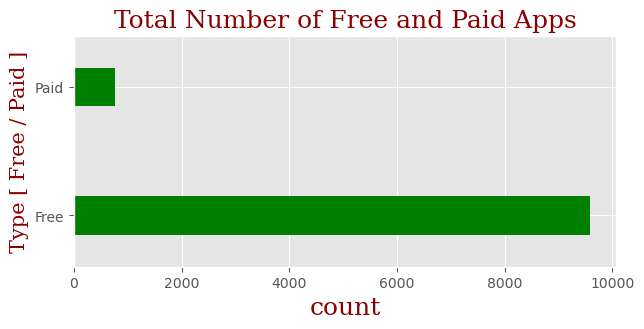

In [50]:
print(data['Type'].value_counts())
plt.figure(figsize=(7,3))
data['Type'].value_counts().plot(kind='barh',color='green',width=0.3)
plt.title("Total Number of Free and Paid Apps",fontdict=font1)
plt.xlabel("count",fontdict=font1)
plt.ylabel("Type [ Free / Paid ]",fontdict=font2)
plt.show()

### Which App Has Maximum Reviews?

In [52]:
max_review = data['Reviews'].max()
data[data['Reviews']==max_review][["App","Reviews"]]

,App,Reviews
2544,Facebook,78158306


- Facebook has the highest number of reviews (78,158,306) in the dataset.
- This shows that Facebook is widely used and highly active, with a very large number of users sharing feedback.
- It also explains why the average review count is high, as a few very popular apps receive far more reviews than most other apps.

### Display Top 5 Apps Having Highest Reviews

In [55]:
top_apps = (
    data.groupby("App", as_index=False)["Reviews"]
        .max()
        .sort_values(by="Reviews", ascending=False)
        .head(5)
)
top_apps

,App,Reviews
4328,Facebook,78158306
9041,WhatsApp Messenger,69119316
5399,Instagram,66577446
6165,Messenger – Text and Video Chat for Free,56646578
2564,Clash of Clans,44893888


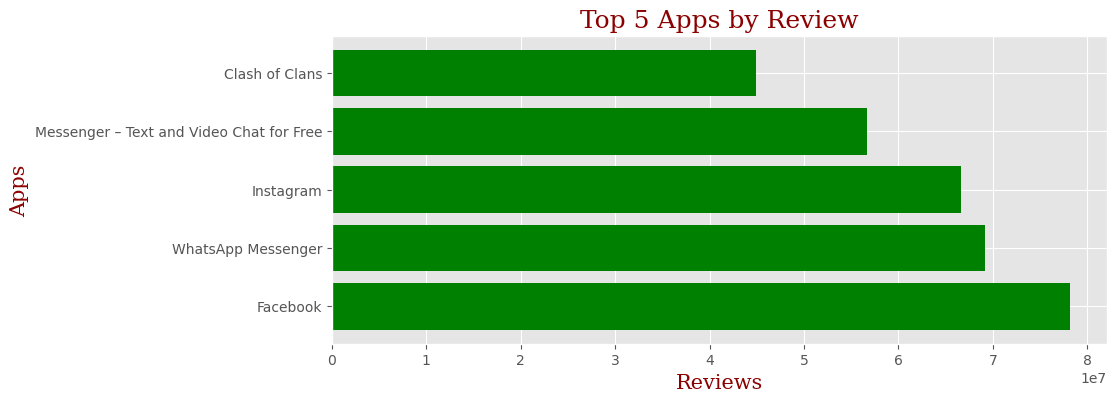

In [56]:
plt.figure(figsize=(10,4))
plt.barh(top_apps["App"], top_apps["Reviews"],color='green')
plt.title("Top 5 Apps by Review",fontdict=font1)
plt.xlabel("Reviews",fontdict=font2)
plt.ylabel("Apps",fontdict=font2)
plt.show()

- The top 5 apps by number of reviews are Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, and Clash of Clans.
- These apps receive tens of millions of reviews, showing that social media, messaging, and popular games attract very high user activity.
- This also shows that only a few big apps get most of the reviews, while most other apps receive far fewer user responses.

### Find Average Rating of Free and Paid Apps

Type
Free    4.183918
Paid    4.247957
Name: Rating, dtype: float64


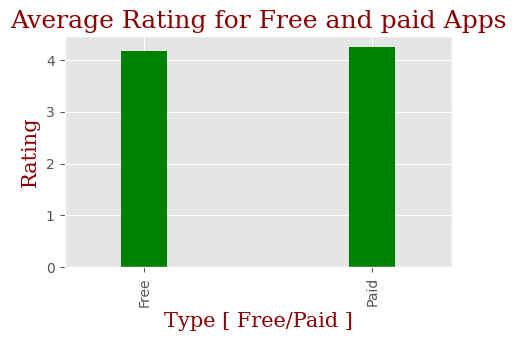

In [59]:
print(data.groupby("Type")['Rating'].mean())
plt.figure(figsize=(5,3))
data.groupby("Type")['Rating'].mean().plot(kind='bar',color='green',width=0.2)
plt.title("Average Rating for Free and paid Apps",fontdict=font1)
plt.xlabel("Type [ Free/Paid ]",fontdict=font2)
plt.ylabel("Rating",fontdict=font2)
plt.show()

- Paid apps have a slightly higher average rating (4.25) compared to free apps (4.18).
- This suggests that users who pay for an app often have clear expectations and are generally more satisfied with the app’s quality.
- Free apps still maintain strong ratings overall, but the small gap shows that paid apps tend to receive more positive feedback on average.

### Top 5 Apps Having Maximum Installs
     1. Remove "+" and "," from Installs column (e.g. "1,000+" → "1000")
     2. Convert Installs column into numbers (if not possible → NaN)


In [62]:
# Remove "+" and "," from Installs column (e.g. "1,000+" → "1000")
data["Installs"] = data["Installs"].str.replace("[+,]", "", regex=True)

# Convert Installs column into numbers (if not possible → NaN)
data["Installs"] = pd.to_numeric(data["Installs"], errors="coerce")

In [63]:
top_apps_install = data.sort_values(by="Installs", ascending=False).head(10)[["App", "Installs"]]
top_apps_install.head(5)

,App,Installs
341,Hangouts,1000000000
3928,YouTube,1000000000
451,Gmail,1000000000
3996,Google Chrome: Fast & Secure,1000000000
1700,Subway Surfers,1000000000


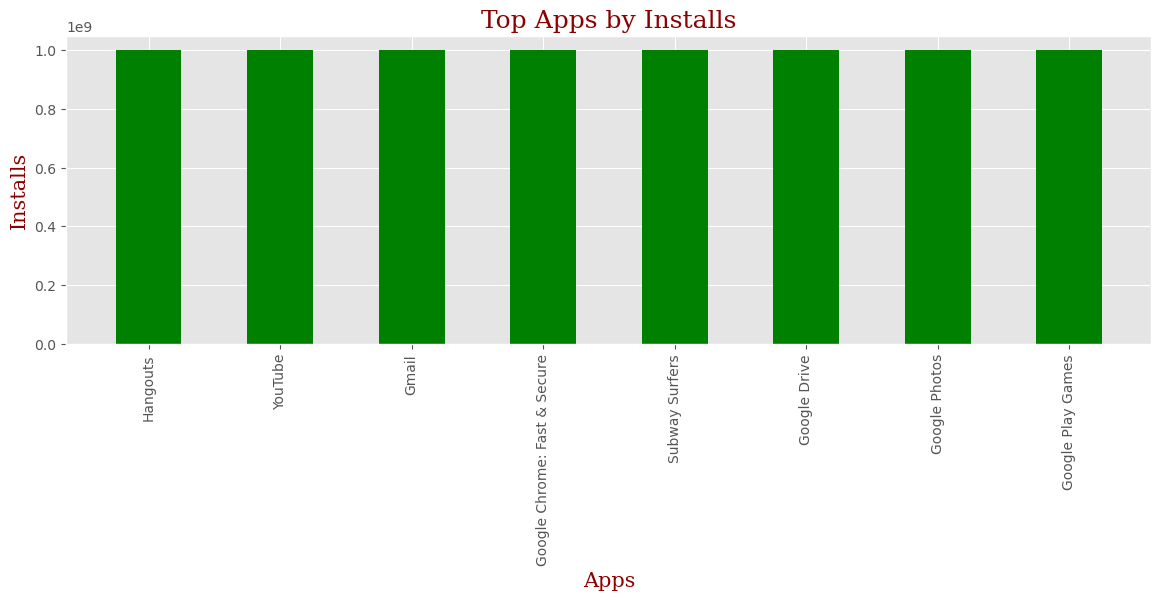

In [64]:
plt.figure(figsize=(14,4))
plt.bar(top_apps_install["App"], top_apps_install["Installs"],color='green',width=0.5)
plt.title("Top Apps by Installs",fontdict=font1)
plt.xlabel("Apps",fontdict=font2)
plt.ylabel("Installs",fontdict=font2)
plt.xticks(rotation=90)
plt.show()

- The top 5 apps by installs are Hangouts, YouTube, Gmail, Google Chrome: Fast & Secure, and Subway Surfers, each with 1 billion installs.
- This shows that Google-owned apps and globally popular games dominate downloads, as they come pre-installed or are widely used across many countries.
- It also highlights that reaching 1 billion installs is limited to only a few apps, showing a huge gap between top apps and the rest of the market.